In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style('whitegrid')
sns.set_context('paper')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train_data.info()
print('-'*30)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fa

<font color=blue>Age，Cabin，Embarked三个特征有缺失值，前两个缺失值较多</font>

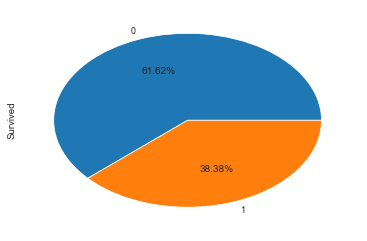

In [4]:
# 查看存活比例
Survived = train_data['Survived'].value_counts()
Survived.plot.pie(autopct='%.2f%%')

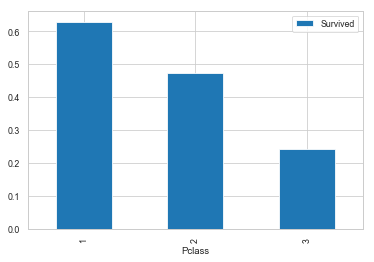

In [5]:
#查看船舱等级存活比例
Pclass = train_data[['Pclass','Survived']].groupby(['Pclass']).mean()
Pclass.plot.bar()

<font color=blue>船舱等级越高，获救率越高</font>

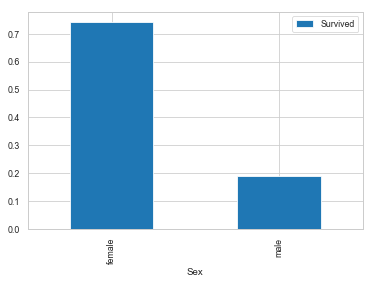

In [6]:
# 查看性别存活比例
Sex = train_data[['Sex', 'Survived']].groupby(['Sex']).mean()
Sex.plot.bar()

<font color=blue>女性存活几率远远大于男性</font>

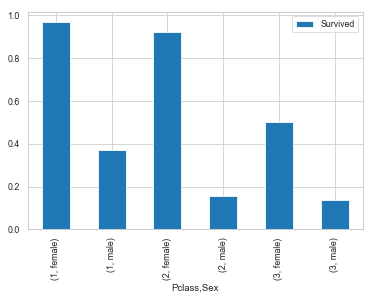

In [7]:
# 查看船舱和性别对存活率的影响
Pclass_Sex = train_data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean()
Pclass_Sex.plot.bar()

<font color=blue>不同船舱等级对获救率的影响较大</font>

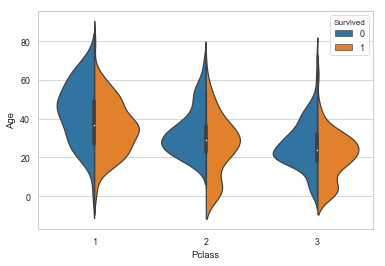

In [8]:
# 年龄与生存率的关系
#fig, ax = plt.subplot(1, 2, figsize=(18,8))
sns.violinplot('Pclass', 'Age', hue='Survived', data=train_data, split=True)

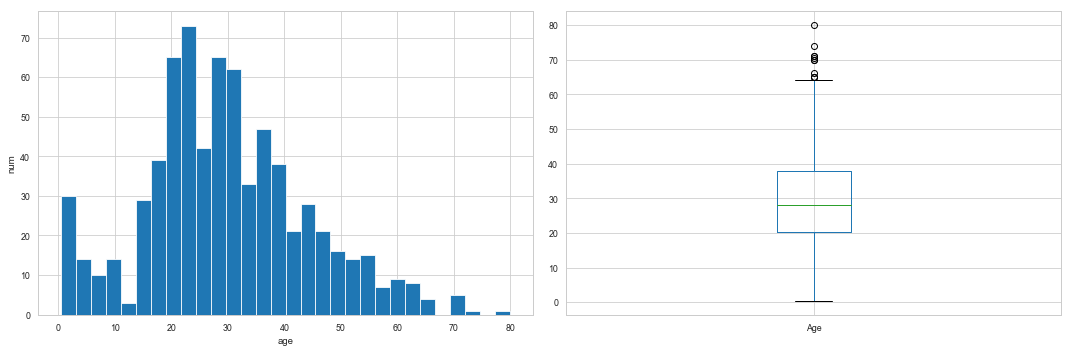

In [9]:
# 总体年龄分布
plt.figure(figsize=(15,5))
plt.subplot(121)
train_data['Age'].hist(bins=30)
plt.tight_layout()
plt.xlabel('age')
plt.ylabel('num')

plt.subplot(122)
train_data.boxplot(column='Age')
plt.tight_layout()

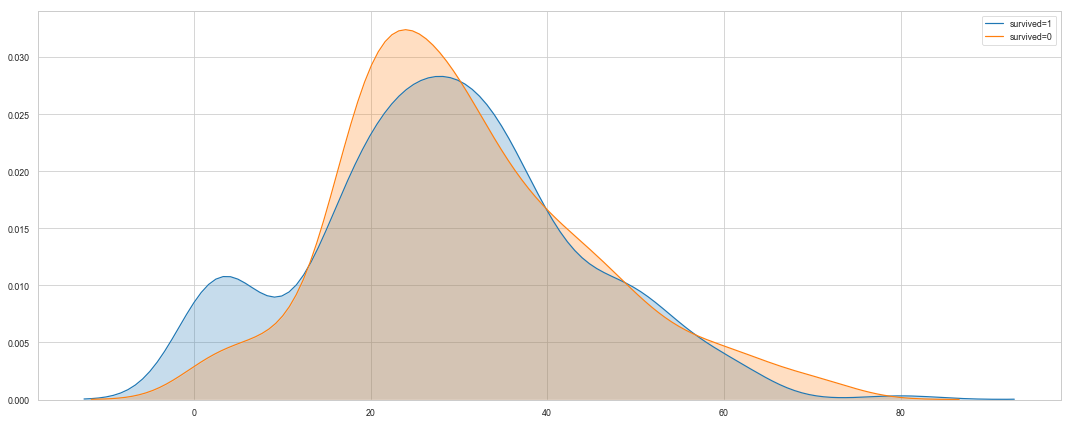

In [22]:
# 查看年龄概率分布曲线
plt.figure(figsize=(15,6))
age_survived = pd.Series(train_data[train_data['Survived']==1]['Age'], name='survived=1')
# age_survived.plot(kind='kde')
sns.kdeplot(age_survived, shade=True)
age_not_survived = pd.Series(train_data[train_data['Survived']==0]['Age'], name='survived=0')
sns.kdeplot(age_not_survived, shade=True)
# age_not_survived.plot(kind='kde')
plt.tight_layout()

In [11]:
# 将年龄划分为儿童，少年，成年，老年四个区域
bins = [0, 12, 18, 65, 100]
train_data['Age_group'] = pd.cut(train_data['Age'], bins)
by_age = train_data[['Age_group','Survived']].groupby('Age_group').mean()
by_age

,Survived
Age_group,
"(0, 12]",0.579710
"(12, 18]",0.428571
"(18, 65]",0.386243
"(65, 100]",0.125000


<Figure size 1080x432 with 0 Axes>

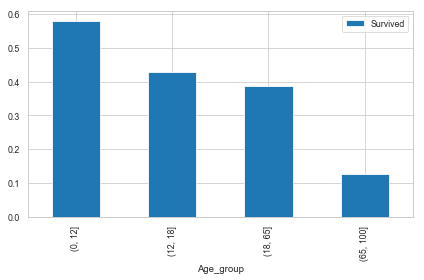

In [12]:
# 查看各年龄段获救概率
plt.figure(figsize=(15, 6))
by_age.plot(kind='bar')
plt.tight_layout()

<font color=blue>年龄小获救概率较大</font>

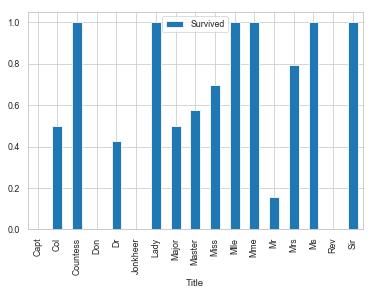

In [13]:
# 称呼对获救的影响
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.')
by_title = train_data[['Title', 'Survived']].groupby('Title').mean()
by_title.plot(kind='bar')

<font color=blue>称呼和获救率有一定关系<font>

<Figure size 1080x432 with 0 Axes>

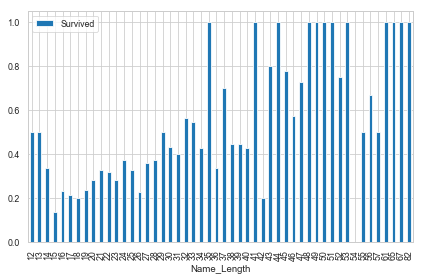

In [14]:
# 名字长度对获救的影响
train_data['Name_Length'] = train_data['Name'].apply(len)
name_length = train_data[['Name_Length', 'Survived']].groupby('Name_Length').mean()
plt.figure(figsize=(15, 6))
name_length.plot(kind='bar')
plt.tight_layout()

<font color=blue>名字长度与是否获救有一定关系，但是这里可能是偶然情况</font>

<Figure size 1080x432 with 0 Axes>

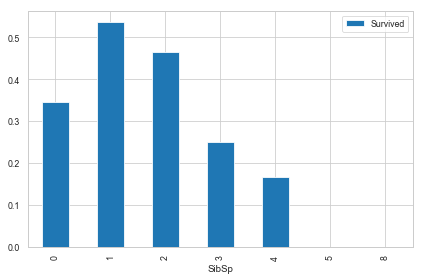

In [15]:
# 兄弟姐妹对存活率的影响
plt.figure(figsize=(15, 6))
train_data[['SibSp', 'Survived']].groupby('SibSp').mean().plot(kind='bar')
plt.tight_layout()

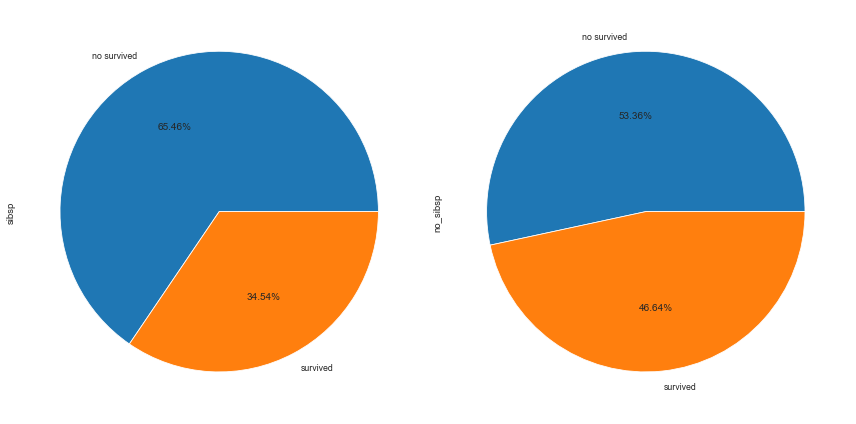

In [16]:
sibsp = pd.Series(train_data[train_data['SibSp'] == 0]['Survived'], name = 'sibsp').value_counts() # 有兄弟姐妹获救情况
no_sibsp = pd.Series(train_data[train_data['SibSp'] != 0]['Survived'], name = 'no_sibsp').value_counts() # 无兄弟姐妹获救情况
plt.figure(figsize=(12, 6))
plt.subplot(121)
sibsp.plot(kind='pie', labels=['no survived','survived'], autopct='%.2f%%')
plt.subplot(122)
no_sibsp.plot(kind='pie', labels=['no survived','survived'], autopct='%.2f%%')
plt.tight_layout()

<font color=blue>有无兄弟姐妹对获救几率有一定影响，可能是因为有的人把获救机会让给兄弟姐妹</font>

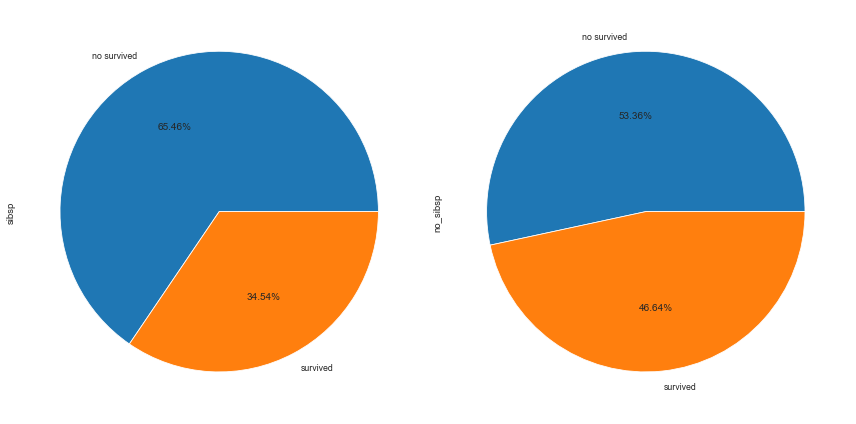

In [17]:
# 有无父母子女对获救的影响
parch = pd.Series(train_data[train_data['Parch'] == 0]['Survived'], name = 'parch').value_counts() # 有父母子女获救情况
no_patrch = pd.Series(train_data[train_data['Parch'] != 0]['Survived'], name = 'no_parch').value_counts() # 无父母子女获救情况
plt.figure(figsize=(12, 6))
plt.subplot(121)
sibsp.plot(kind='pie', labels=['no survived','survived'], autopct='%.2f%%')
plt.subplot(122)
no_sibsp.plot(kind='pie', labels=['no survived','survived'], autopct='%.2f%%')
plt.tight_layout()

<font color=blue>与兄弟姐妹类似</font>

<Figure size 1080x432 with 0 Axes>

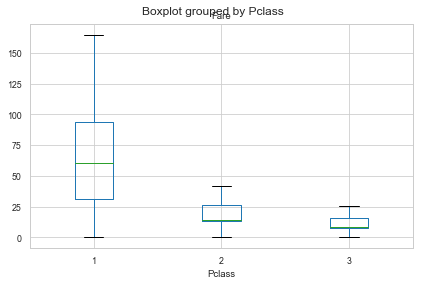

In [18]:
# 票价分布
plt.figure(figsize=(15,6))
train_data.boxplot(column='Fare', by='Pclass', showfliers=False)
plt.tight_layout()

In [19]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

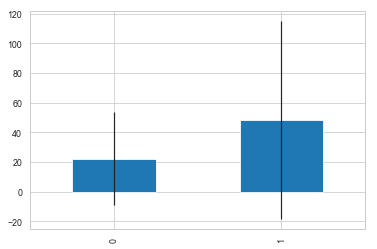

In [21]:
# 生存与否与票价均值和方差的关系
fare_not_survived = train_data['Fare'][train_data['Survived'] == 0]
fare_survived = train_data['Fare'][train_data['Survived'] == 1]

average_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])
average_fare.plot(yerr=std_fare, kind='bar', legend=False) # 误差柱状图

<font color=blue>船舱类型和存活关系<font>

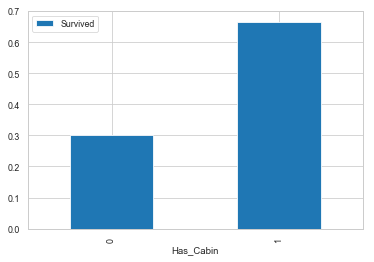

In [33]:
# 由于船舱的缺失值过多，这里把无船舱的填充为U0
train_data.loc[train_data.Cabin.isnull(), 'Cabin'] = 'U0'
train_data['Has_Cabin'] = train_data['Cabin'].apply(lambda x: 0 if x=='U0' else 1)
train_data[['Has_Cabin', 'Survived']].groupby(['Has_Cabin']).mean().plot.bar()

<font color=blue>无船舱客人的获救概率低于有船舱客人获救概率</font>

<font color=blue>港口和存活之间的关系<font>

Text(0.5,1,'Embarked and SUrvived')

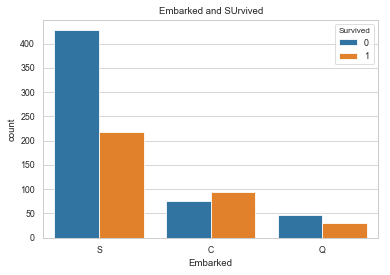

In [36]:
sns.countplot('Embarked', hue='Survived', data=train_data)
plt.title('Embarked and SUrvived')

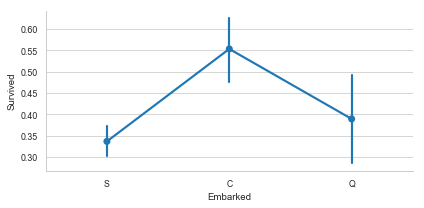

In [41]:
sns.factorplot('Embarked', 'Survived', data=train_data, size=3, aspect=2)

<font color=blue>船舱c的获救概率最大</font>